In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv('Insurance_data.csv')

In [7]:
df

,Policy Number,Number of Vehicles,Average Age,Gender Dummy,Married Dummy,Avg Veh Age,Fuel Type Dummy,Losses
0,150023,1,20.6,1,0,12.97,0,203.319595
1,152720,1,42.4,0,1,8.02,0,402.197302
2,174207,1,42.4,1,0,2.50,1,553.132096
3,139895,1,42.4,0,0,12.97,0,292.430579
4,174407,1,20.6,1,1,12.97,0,246.540576
...,...,...,...,...,...,...,...,...
15285,189499,4,65.1,0,1,12.97,0,58.426429
15286,142111,4,65.1,0,0,8.02,0,304.519134
15287,175986,4,65.1,0,0,12.97,0,282.149148
15288,199800,4,20.6,1,0,8.02,1,822.470554


In [44]:
x=df['Average Age']
y=df['Fuel Type Dummy']

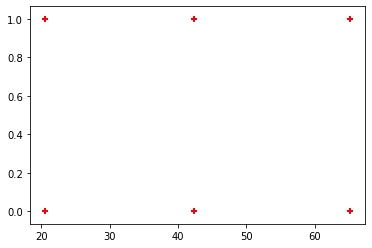

In [45]:
plt.scatter(x,y,marker='+',color='red')

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df[['Average Age']],df['Fuel Type Dummy'],train_size=0.8)

In [48]:
X_train

,Average Age
14934,65.1
3032,65.1
13966,42.4
2144,20.6
9827,42.4
...,...
13163,65.1
7570,65.1
3473,20.6
7257,20.6


In [49]:
X_test

,Average Age
3804,20.6
12447,20.6
12966,65.1
1621,20.6
12957,20.6
...,...
3325,42.4
14346,42.4
4826,65.1
14143,42.4


In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [51]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
predicted_score=model.predict(X_test)

In [53]:
predicted_score

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
model.score(X_test,y_test)

0.7727272727272727

In [55]:
model.coef_

array([[-0.05547277]])

In [56]:
model.intercept_

array([0.96330233])

In [57]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [58]:
def prediction_function(age):
    z = model.coef_ * age + model.intercept_
    y = sigmoid(z)
    return y

In [59]:
age=20.6
prediction_function(20.6)

0.45526076926231135

In [61]:
age =2.50
prediction_function(age)

0.6952162395199014